### Package Installation and Preparation

1.  **Exploratory Data Analysis (EDA):**
   - **xarray:** For working with multi-dimensional labeled arrays, especially for handling NetCDF files.
   - **NumPy:** For numerical operations and array manipulations.ns.
   - **Pandas:** For data manipulation and analysis.
   - **Matplotlib and Seaborn:** For data visualization and statistical graphics.

```bash
pip install xarray numpy pandas matplotlib seaborn
```

2. **Investigate Temporal Patterns, Trends, and Relationships:**
   - **xarray:** For time-series analysis and handling multi-dimensional data.
   - **Matplotlib and Seaborn:** For time-series plotting and visualization.

```bash
pip install xarray matplotlib seaborn
```

3. **Correlation and Regression:**
   - **xarray:** For handling and analyzing multi-dimensional data.
   - **SciPy:** For statistical analysis, including correlation and regression.

```bash
pip install xarray scipy
```

4. **GIS Tools for Spatial Analysis:**
   - **Geopandas:** For working with geospatial data in a Pandas-like environment.
   - **Folium:** For creating interactive leaflet maps.
   - **Shapely:** For geometry operations.

```bash
pip install geopandas folium shapely
```

In [9]:
#!pip install xarray numpy pandas matplotlib seaborn scipy

In [6]:
#!pip install geopandas folium shapely

In [19]:
#!pip install toolz

### Data Preparation


For handling NetCDF files, xarray is particularly powerful and integrates well with other scientific libraries. Here's a basic example of how you might use xarray to find the difference between V wind at 200 hPa and 800 hPa levels:

```python
import xarray as xr

# Load NetCDF data using xarray
wind_v_200hpa = xr.open_dataset('path/to/wind_v_200hpa.nc')['v_component_of_wind']
wind_v_800hpa = xr.open_dataset('path/to/wind_v_800hpa.nc')['v_component_of_wind']

# Calculate the vertical wind shear
vertical_wind_shear = wind_v_200hpa - wind_v_800hpa
```

### CMIP5 Dataset

In [44]:
import xarray as xr

#### Vertical Wind Component

In [20]:
## Vertical Wind Component 5 years each from 2006 to 2020
wind_v_06_10 = xr.open_dataset('data/CMIP5/v_wind/va_Amon_GFDL-CM2p1_rcp45_r10i1p1_200601-201012.nc')
wind_v_11_15 = xr.open_dataset('data/CMIP5/v_wind/va_Amon_GFDL-CM2p1_rcp45_r10i1p1_201101-201512.nc')
wind_v_16_20 = xr.open_dataset('data/CMIP5/v_wind/va_Amon_GFDL-CM2p1_rcp45_r10i1p1_201601-202012.nc')

## merge data into one array
wind_vc = xr.concat([wind_v_06_10, wind_v_11_15, wind_v_16_20], dim = "time")

In [23]:
#print(wind_vc)

In [24]:
# Define the bounding box coordinates for West Africa
lon_min, lat_min, lon_max, lat_max = -20, -5, 25, 20

# Subset the dataset based on the bounding box
west_africa_data = wind_vc.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))

In [32]:
# Print the updated dataset
#print(west_africa_data)

In [43]:
#west_africa_data

In [152]:
# wind_200hpa.va

In [153]:
# wind_850hpa.va

In [37]:
# Extract data for the 200 hPa and 800 hPa levels
wind_200hpa = west_africa_data.sel(plev=20000)  # 200 hPa level
wind_850hpa = west_africa_data.sel(plev=85000)  # 800 hPa level

# Calculate vertical wind shear by subtracting values at 800 hPa from values at 200 hPa
vertical_wind_shear = wind_200hpa.va - wind_850hpa.va

In [154]:
# vertical_wind_shear

In [155]:
# Print the resulting dataset
# print(vertical_wind_shear)

In [63]:
#vertical_wind_shear

#### Precipitatlon Flux

In [54]:
## Precipitation Flux
pr_06_10 = xr.open_dataset('data/CMIP5/precip/pr_Amon_GFDL-CM2p1_rcp45_r10i1p1_200601-201012.nc')
pr_11_15 = xr.open_dataset('data/CMIP5/precip/pr_Amon_GFDL-CM2p1_rcp45_r10i1p1_201101-201512.nc')
pr_16_20 = xr.open_dataset('data/CMIP5/precip/pr_Amon_GFDL-CM2p1_rcp45_r10i1p1_201601-202012.nc')

# merge data into an array
precip = xr.concat([pr_06_10, pr_11_15, pr_16_20], dim = "time")

In [55]:
# Define the bounding box coordinates for West Africa
lon_min, lat_min, lon_max, lat_max = -20, -5, 25, 20

# Subset the dataset based on the bounding box
west_africa_data = precip.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))

In [56]:
#west_africa_data

In [57]:
# Extract precipitation data

pr_flux = west_africa_data.pr

In [64]:
#print(pr_flux)

In [156]:
# pr_flux

### Exploratory Data Analysis (EDA):

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [120]:
#print(len(time_values))
#print(len(wind_shear_values))
#mdates.num2date(time_values)

### Create Directory for Saving Figures

In [145]:
import os

# Create a directory named 'figures' if it doesn't exist
save_dir = 'figures'
os.makedirs(save_dir, exist_ok=True)

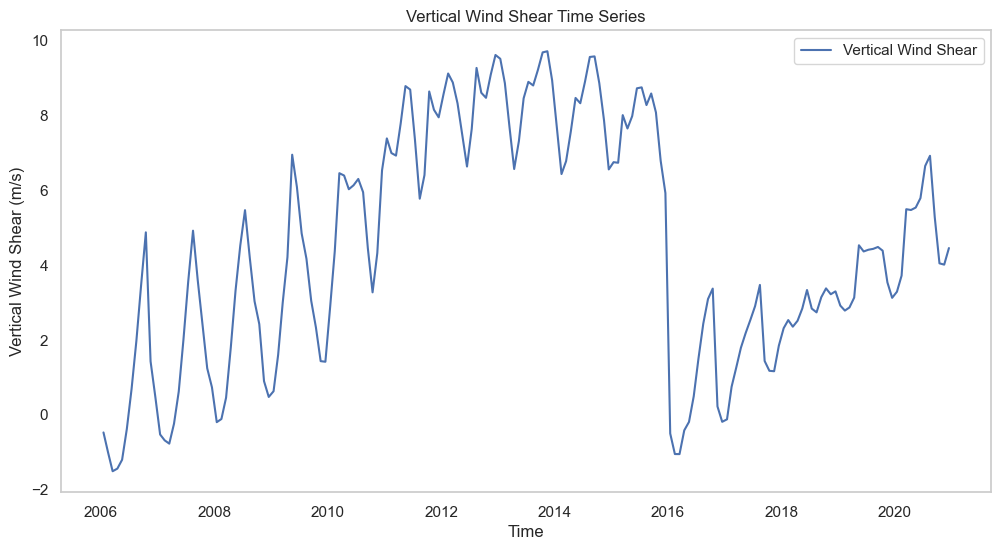

In [160]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np

# Extracting variables
time_values = vertical_wind_shear.time.values
wind_shear_values = vertical_wind_shear.values.flatten()

# Convert cftime datetime values to Python datetime objects
time_values = [mdates.date2num(val) for val in time_values]

# Reshape wind shear values to match the shape of time values
wind_shear_values = wind_shear_values[:len(time_values)]

# Plotting the time series without yearly averaging
plt.figure(figsize=(12, 6))
plt.plot(mdates.num2date(time_values), wind_shear_values, label='Vertical Wind Shear')
plt.xlabel('Time')
plt.ylabel('Vertical Wind Shear (m/s)')
plt.title('Vertical Wind Shear Time Series')
plt.legend()
plt.grid(False)

# Save the figure in the 'figures' directory
plt.savefig(os.path.join(save_dir, 'Vertical Wind Shear Time Series.png'))

# Display the plot
plt.show()


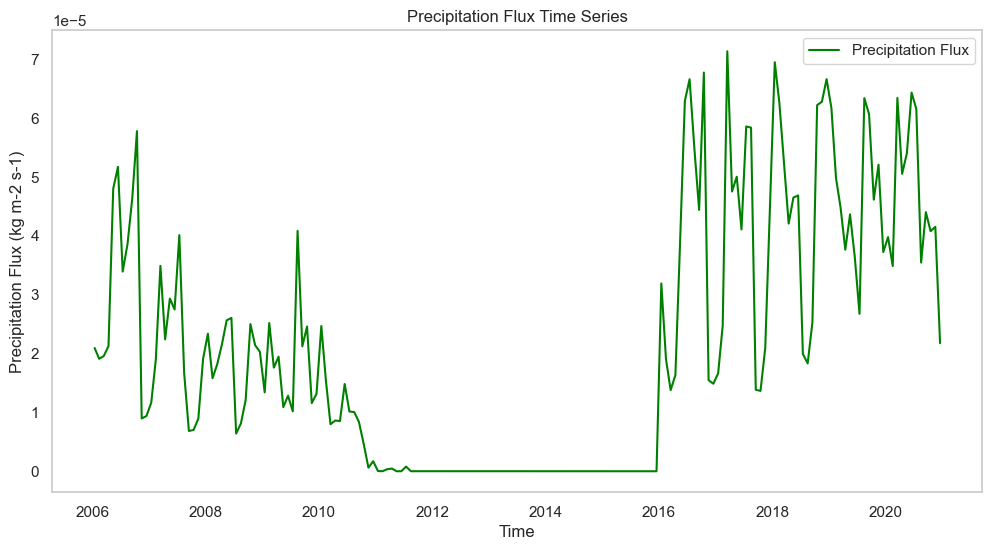

In [161]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np

# Extracting variables
time_values = pr_flux.time.values
pr_flux_values = pr_flux.values.flatten()

# Convert cftime datetime values to Python datetime objects
time_values = [mdates.date2num(val) for val in time_values]

# Reshape wind shear values to match the shape of time values
pr_flux_values = pr_flux_values[:len(time_values)]

# Plotting the time series without yearly averaging
plt.figure(figsize=(12, 6))
plt.plot(mdates.num2date(time_values), pr_flux_values, label='Precipitation Flux', color='green')
plt.xlabel('Time')
plt.ylabel('Precipitation Flux (kg m-2 s-1)')
plt.title('Precipitation Flux Time Series')
plt.legend()
plt.grid(False)

# Save the figure in the 'figures' directory
plt.savefig(os.path.join(save_dir, 'Precipitation Flux Time Series'))

# Display the plot
plt.show()


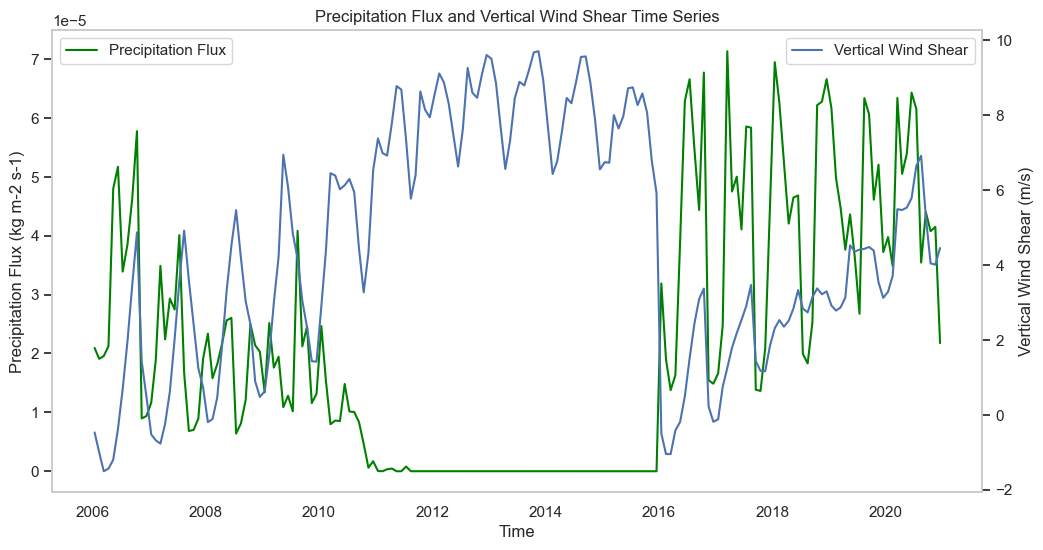

In [144]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np



# Extracting variables for Precipitation Flux
time_values_pr_flux = pr_flux.time.values
pr_flux_values = pr_flux.values.flatten()

# Convert cftime datetime values to Python datetime objects
time_values_pr_flux = [mdates.date2num(val) for val in time_values_pr_flux]

# Reshape precipitation flux values to match the shape of time values
pr_flux_values = pr_flux_values[:len(time_values_pr_flux)]

# Extracting variables for Vertical Wind Shear
time_values_wind_shear = vertical_wind_shear.time.values
wind_shear_values = vertical_wind_shear.values.flatten()

# Convert cftime datetime values to Python datetime objects
time_values_wind_shear = [mdates.date2num(val) for val in time_values_wind_shear]

# Reshape wind shear values to match the shape of time values
wind_shear_values = wind_shear_values[:len(time_values_wind_shear)]

# Plotting both time series on the same plot with secondary y-axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting Precipitation Flux on the left y-axis
ax1.plot(mdates.num2date(time_values_pr_flux), pr_flux_values, label='Precipitation Flux', color='green')
ax1.set_xlabel('Time')
ax1.set_ylabel('Precipitation Flux (kg m-2 s-1)')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')
plt.grid(False)

# Creating a secondary y-axis for Vertical Wind Shear on the right
ax2 = ax1.twinx()
ax2.plot(mdates.num2date(time_values_wind_shear), wind_shear_values, label='Vertical Wind Shear')
ax2.set_ylabel('Vertical Wind Shear (m/s)')
ax2.tick_params(axis='y')
ax2.legend(loc='upper right')
plt.grid(False)

plt.title('Precipitation Flux and Vertical Wind Shear Time Series')
plt.grid(False)

# Save the figure in the 'figures' directory
plt.savefig(os.path.join(save_dir, 'Precipitation Flux and Vertical Wind Shear Time Series.png'))

# Display the plot
plt.show()


### Investigate Temporal Patterns and Relationships:

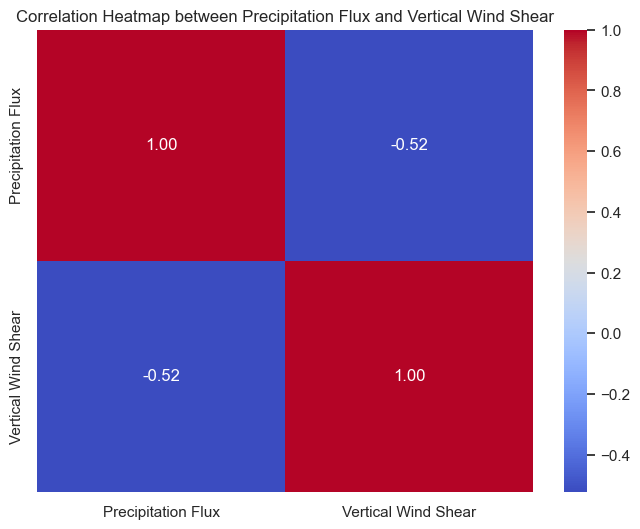

In [173]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd
# import numpy as np
# import os

# # Create a directory named 'figures' if it doesn't exist
# save_dir = 'figures'
# os.makedirs(save_dir, exist_ok=True)

# # Load the data into DataFrames
# df_pr_flux = pd.DataFrame({'Time': time_values_pr_flux, 'Precipitation Flux': pr_flux_values})
# df_wind_shear = pd.DataFrame({'Time': time_values_wind_shear, 'Vertical Wind Shear': wind_shear_values})

# # Convert time to datetime
# df_pr_flux['Time'] = pd.to_datetime(df_pr_flux['Time'])
# df_wind_shear['Time'] = pd.to_datetime(df_wind_shear['Time'])

# # Set Time as the index
# df_pr_flux.set_index('Time', inplace=True)
# df_wind_shear.set_index('Time', inplace=True)

# # Resample data to monthly averages
# df_pr_flux_monthly = df_pr_flux.resample('M').mean()
# df_wind_shear_monthly = df_wind_shear.resample('M').mean()

# # Plot time series of Precipitation Flux and Vertical Wind Shear
# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# ax1.plot(df_pr_flux.index, df_pr_flux['Precipitation Flux'], label='Precipitation Flux', color='blue')
# plt.grid(False)
# ax1.set_ylabel('Precipitation Flux (kg m-2 s-1)')
# ax1.legend(loc='upper left')
# plt.grid(False)

# ax2.plot(df_wind_shear.index, df_wind_shear['Vertical Wind Shear'], label='Vertical Wind Shear', color='green')
# ax2.set_xlabel('Time')
# ax2.set_ylabel('Vertical Wind Shear (m/s)')
# ax2.legend(loc='upper left')
# plt.grid(False)

# plt.suptitle('Time Series of Precipitation Flux and Vertical Wind Shear')

# # Save the figure
# plt.savefig(os.path.join(save_dir, 'time_series_precipitation_wind_shear.png'))

# # Plot monthly averages
# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# ax1.plot(df_pr_flux_monthly.index, df_pr_flux_monthly['Precipitation Flux'], label='Precipitation Flux', color='blue')
# ax1.set_ylabel('Precipitation Flux (kg m-2 s-1)')
# ax1.legend(loc='upper left')

# ax2.plot(df_wind_shear_monthly.index, df_wind_shear_monthly['Vertical Wind Shear'], label='Vertical Wind Shear', color='green')
# ax2.set_xlabel('Time')
# ax2.set_ylabel('Vertical Wind Shear (m/s)')
# ax2.legend(loc='upper left')

# plt.suptitle('Monthly Averages of Precipitation Flux and Vertical Wind Shear')

# # Save the figure
# plt.savefig(os.path.join(save_dir, 'monthly_averages_precipitation_wind_shear.png'))

# Check for correlations
df_combined = pd.concat([df_pr_flux, df_wind_shear], axis=1)
correlation_matrix = df_combined.corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap between Precipitation Flux and Vertical Wind Shear')
plt.savefig(os.path.join(save_dir, 'correlation_heatmap.png'))

# Show the plots
plt.show()


In [169]:
correlation_matrix

,Precipitation Flux,Vertical Wind Shear
Precipitation Flux,1.000000,-0.522382
Vertical Wind Shear,-0.522382,1.000000


The correlation matrix shows the correlation coefficients between the Precipitation Flux and Vertical Wind Shear. Each number in the matrix represents the strength and direction of the linear relationship between the corresponding variables.

Here's how to interpret the matrix:

1. **Correlation between Precipitation Flux and Itself:**
   - The correlation of a variable with itself is always 1.0 (perfect positive correlation). In this case, the correlation between Precipitation Flux and Precipitation Flux is 1.0.

2. **Correlation between Precipitation Flux and Vertical Wind Shear:**
   - The correlation coefficient between Precipitation Flux and Vertical Wind Shear is approximately -0.52.
   - The negative sign indicates a negative correlation, which means that as one variable increases, the other tends to decrease.
   - The magnitude (-0.52) suggests a moderate strength of the correlation. In statistical terms, this suggests a moderate negative linear relationship between Precipitation Flux and Vertical Wind Shear.

3. **Correlation between Vertical Wind Shear and Itself:**
   - Similar to Precipitation Flux, the correlation of Vertical Wind Shear with itself is 1.0.

In summary, the correlation matrix indicates that there is a moderate negative correlation between Precipitation Flux and Vertical Wind Shear. It implies that, on average, when Precipitation Flux increases, Vertical Wind Shear tends to decrease, and vice versa. Keep in mind that correlation does not imply causation; it only measures the strength and direction of linear relationships.

### Statistical Analyses:

In [183]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming 'vertical_wind_shear' is your independent variable and 'pr_flux' is the dependent variable
X = vertical_wind_shear.values.reshape(-1, 1)
y = pr_flux.values.flatten()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict precipitation for the test set
y_pred = model.predict(X_test)


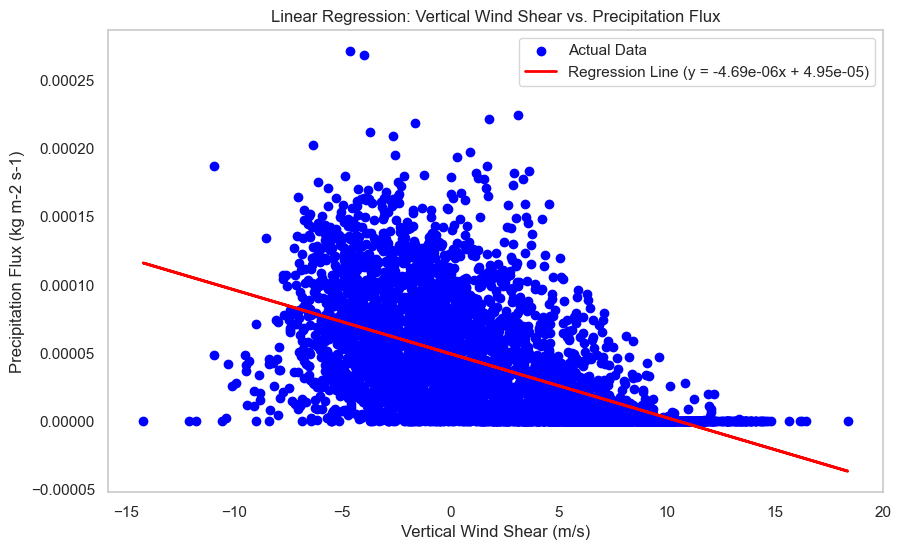

In [198]:
# Extract the coefficients and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Visualize the model
plt.figure(figsize=(10, 6))

# Scatter plot of the data points
plt.scatter(X_test, y_test, color='blue', label='Actual Data')

# Plot the regression line
label = f'Regression Line (y = {slope:.2e}x + {intercept:.2e})'
plt.plot(X_test, y_pred, color='red', linewidth=2, label=label)

# Add labels and title
plt.xlabel('Vertical Wind Shear (m/s)')
plt.ylabel('Precipitation Flux (kg m-2 s-1)')
plt.title('Linear Regression: Vertical Wind Shear vs. Precipitation Flux')
plt.legend()
plt.grid(False)

plt.savefig(os.path.join(save_dir, 'Linear Regression_Vertical_Wind_Shear_vs_Precipitation_Flux.png'))

# Show the plots
plt.show()


In [196]:
# import geopandas as gpd
# import numpy as np
# import matplotlib.pyplot as plt

# # Assuming you have a DataFrame with columns 'lat', 'lon', 'pr_flux', and 'vertical_wind_shear'
# # Replace this with your actual data
# data = {
#     'lat': np.repeat(vertical_wind_shear.lat.values.flatten(), len(vertical_wind_shear.lon)),
#     'lon': np.tile(vertical_wind_shear.lon.values.flatten(), len(vertical_wind_shear.lat)),
#     'pr_flux': pr_flux.values.flatten(),
#     'vertical_wind_shear': vertical_wind_shear.values.flatten()
# }

# # Create a GeoDataFrame
# gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['lon'], data['lat']))

# # Plotting spatial distribution of precipitation flux
# fig, ax = plt.subplots(figsize=(10, 8))
# gdf.plot.scatter(x='lon', y='lat', c='pr_flux', cmap='viridis', s=20, ax=ax)
# plt.title('Spatial Distribution of Precipitation Flux')
# plt.show()

# # Plotting spatial distribution of vertical wind shear
# fig, ax = plt.subplots(figsize=(10, 8))
# gdf.plot.scatter(x='lon', y='lat', c='vertical_wind_shear', cmap='viridis', s=20, ax=ax)
# plt.title('Spatial Distribution of Vertical Wind Shear')
# plt.show()


In [182]:
# # Assuming you have two arrays or columns 'wind_shear' and 'precipitation'
# correlation_coefficient = np.corrcoef(vertical_wind_shear.values.flatten(), pr_flux.values.flatten())[0, 1]
# print(f"Correlation Coefficient: {correlation_coefficient}")

In [164]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# import os

# # Create a directory named 'figures' if it doesn't exist
# save_dir = 'figures'
# os.makedirs(save_dir, exist_ok=True)

# # Function to calculate and plot statistics for a variable over time
# def plot_variable_statistics(time_values, variable_values, variable_name, unit):
#     # Calculate statistics
#     mean_value = np.mean(variable_values)
#     std_dev_value = np.std(variable_values)
#     percentiles = np.percentile(variable_values, [25, 50, 75])

#     # Plot the time series
#     plt.figure(figsize=(12, 6))
#     plt.plot(mdates.num2date(time_values), variable_values, label=f'{variable_name} Time Series')
#     plt.xlabel('Time')
#     plt.ylabel(f'{variable_name} ({unit})')
#     plt.title(f'{variable_name} Time Series with Statistics')
#     plt.legend()
#     plt.grid(True)

#     # Display statistics on the plot
#     plt.text(0.05, 0.9, f'Mean: {mean_value:.2f} {unit}', transform=plt.gca().transAxes)
#     plt.text(0.05, 0.85, f'Standard Deviation: {std_dev_value:.2f} {unit}', transform=plt.gca().transAxes)
#     plt.text(0.05, 0.8, f'25th Percentile: {percentiles[0]:.2f} {unit}', transform=plt.gca().transAxes)
#     plt.text(0.05, 0.75, f'50th Percentile (Median): {percentiles[1]:.2f} {unit}', transform=plt.gca().transAxes)
#     plt.text(0.05, 0.7, f'75th Percentile: {percentiles[2]:.2f} {unit}', transform=plt.gca().transAxes)

#     # Save the figure
#     plt.savefig(os.path.join(save_dir, f'{variable_name}_statistics.png'))

#     # Show the plot
#     plt.show()

# # Plot statistics for Precipitation Flux
# plot_variable_statistics(time_values_pr_flux, pr_flux_values, 'Precipitation Flux', 'kg m-2 s-1')

# # Plot statistics for Vertical Wind Shear
# plot_variable_statistics(time_values_wind_shear, wind_shear_values, 'Vertical Wind Shear', 'm/s')


In [141]:
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# from datetime import datetime
# import numpy as np
# 
# # Extracting variables
# time_values = vertical_wind_shear.time.values
# wind_shear_values = vertical_wind_shear.values.flatten()
# lon_values = np.repeat(vertical_wind_shear.lon.values, len(vertical_wind_shear.lat))
# lat_values = np.tile(vertical_wind_shear.lat.values, len(vertical_wind_shear.lon))
# 
# # Convert cftime datetime values to Python datetime objects
# time_values = [mdates.date2num(val) for val in time_values]
# 
# # Reshape wind shear values to match the shape of time values
# wind_shear_values = wind_shear_values[:len(time_values)]
# 
# # Plotting the time series with wind shear values determining color
# plt.figure(figsize=(12, 6))
# scatter = plt.scatter(mdates.num2date(time_values), wind_shear_values, c=wind_shear_values, cmap='viridis', label='Vertical Wind Shear')
# plt.colorbar(scatter, label='Vertical Wind Shear (m/s)')
# plt.xlabel('Time')
# plt.ylabel('Vertical Wind Shear (m/s)')
# plt.title('Vertical Wind Shear Time Series with Color-Coded Wind Shear')
# plt.legend()
# plt.grid(True)
# plt.show()


In [142]:
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# from datetime import datetime
# import numpy as np
# 
# # Extracting variables
# time_values = vertical_wind_shear.time.values
# wind_shear_values = vertical_wind_shear.values.flatten()
# lon_values = np.repeat(vertical_wind_shear.lon.values, len(vertical_wind_shear.lat))
# lat_values = np.tile(vertical_wind_shear.lat.values, len(vertical_wind_shear.lon))
# 
# # Convert cftime datetime values to Python datetime objects
# time_values = [mdates.date2num(val) for val in time_values]
# 
# # Reshape wind shear values to match the shape of time values
# wind_shear_values = wind_shear_values[:len(time_values)]
# 
# # Plotting the time series with wind shear values determining color
# plt.figure(figsize=(12, 6))
# scatter = plt.scatter(mdates.num2date(time_values), wind_shear_values, c=wind_shear_values, cmap='viridis', label='Vertical Wind Shear')
# plt.colorbar(scatter, label='Vertical Wind Shear (m/s)')
# plt.xlabel('Time')
# plt.ylabel('Vertical Wind Shear (m/s)')
# plt.title('Vertical Wind Shear Time Series with Color-Coded Wind Shear')
# 
# # Adding longitude and latitude information to the plot
# for lon, lat, time_val, shear_val in zip(lon_values, lat_values, mdates.num2date(time_values), wind_shear_values):
#   plt.text(time_val, shear_val, f'Lon: {lon}, Lat: {lat}', fontsize=8, color='red', alpha=0.7)
# 
# plt.legend()
# plt.grid(True)
# plt.show()


In [150]:
# # Function to plot time series for 3D data
# def plot_time_series_3d(data, ylabel, title):
#     plt.figure(figsize=(12, 6))
    
#     # Convert time values to numeric format
#     numeric_time = pd.to_numeric(data.time.values)
    
#     for lat in data.lat:
#         for lon in data.lon:
#             data_slice = data.sel(lat=lat, lon=lon)
            
#             # Convert time values for the current slice to numeric format
#             numeric_time_slice = pd.to_numeric(data_slice.time.values)
            
#             plt.plot(numeric_time_slice, data_slice, label=f'Lat: {lat}, Lon: {lon}')

#     plt.xlabel('Time')
#     plt.ylabel(ylabel)
#     plt.title(title)
#     plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.grid(True)
#     plt.show()

# # Plot time series for vertical wind shear
# plot_time_series_3d(vertical_wind_shear, 'Vertical Wind Shear (m/s)', 'Vertical Wind Shear Time Series')


In [151]:
# # Function to plot time series for 3D data
# def plot_time_series_3d(data, ylabel, title):
#     plt.figure(figsize=(12, 6))
#     for lat in data.lat:
#         for lon in data.lon:
#             data_slice = data.sel(lat=lat, lon=lon)
#             plt.plot(data_slice.time, data_slice, label=f'Lat: {lat}, Lon: {lon}')

#     plt.xlabel('Time')
#     plt.ylabel(ylabel)
#     plt.title(title)
#     plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.grid(True)
#     plt.show()

# # Plot time series for vertical wind shear
# plot_time_series_3d(vertical_wind_shear, 'Vertical Wind Shear (m/s)', 'Vertical Wind Shear Time Series')


In [149]:
# import matplotlib.dates as mdates

# # Function to plot time series for 3D data
# def plot_time_series_3d(data, ylabel, title):
#     plt.figure(figsize=(12, 6))
    
#     # Convert time values to matplotlib dates
#     time_values = mdates.date2num(data.time.values)
    
#     for lat in data.lat:
#         for lon in data.lon:
#             data_slice = data.sel(lat=lat, lon=lon)
            
#             # Convert time values for the current slice to matplotlib dates
#             time_slice_values = mdates.date2num(data_slice.time.values)
            
#             plt.plot(time_slice_values, data_slice, label=f'Lat: {lat}, Lon: {lon}')

#     plt.xlabel('Time')
#     plt.ylabel(ylabel)
#     plt.title(title)
#     #plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.grid(True)
#     plt.show()

# # Plot time series for vertical wind shear
# plot_time_series_3d(vertical_wind_shear, 'Vertical Wind Shear (m/s)', 'Vertical Wind Shear Time Series')


In [148]:
# import matplotlib.dates as mdates

# # Function to plot time series for 3D data
# def plot_time_series_3d(data, ylabel, title):
#     plt.figure(figsize=(12, 6))
    
#     # Extract year and month from time values
#     years = [time.year for time in data.time.values]
#     months = [time.month for time in data.time.values]
    
#     # Combine years and months to create a new datetime array
#     time_values = pd.to_datetime({'year': years, 'month': months, 'day': 1})
    
#     for lat in data.lat:
#         for lon in data.lon:
#             data_slice = data.sel(lat=lat, lon=lon)
            
#             plt.plot(time_values, data_slice, label=f'Lat: {lat}, Lon: {lon}')

#     # Format x-axis as Year-Month
#     plt.gca().xaxis.set_major_locator(mdates.YearLocator())
#     plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

#     plt.xlabel('Time')
#     plt.ylabel(ylabel)
#     plt.title(title)
#     #plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.grid(True)
#     plt.show()

# # Plot time series for vertical wind shear
# plot_time_series_3d(vertical_wind_shear, 'Vertical Wind Shear (m/s)', 'Vertical Wind Shear Time Series')


In [147]:
# import matplotlib.dates as mdates
# 
# # Function to plot time series for 3D data
# def plot_time_series_3d(data, ylabel, title):
#   plt.figure(figsize=(12, 6))
# 
# # Convert time values to matplotlib dates
# time_values = mdates.date2num(data.time.values)
# 
# for lat in data.lat:
#   for lon in data.lon:
#   data_slice = data.sel(lat=lat, lon=lon)
# 
# # Convert time values for the current slice to matplotlib dates
# time_slice_values = mdates.date2num(data_slice.time.values)
# 
# # Use bar plot instead of line plot
# plt.bar(time_slice_values, data_slice, label=f'Lat: {lat}, Lon: {lon}', alpha=0.7)
# 
# plt.xlabel('Time')
# plt.ylabel(ylabel)
# plt.title(title)
# ##plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True)
# plt.show()
# 
# # Plot time series for vertical wind shear using bar plot
# plot_time_series_3d(vertical_wind_shear, 'Vertical Wind Shear (m/s)', 'Vertical Wind Shear Time Series')


In [146]:
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# from datetime import datetime
# import numpy as np
# 
# # Extracting variables
# time_values = vertical_wind_shear.time.values
# wind_shear_values = vertical_wind_shear.values.flatten()
# 
# # Convert cftime datetime values to Python datetime objects
# time_values = [mdates.date2num(val) for val in time_values]
# 
# # Reshape wind shear values to match the shape of time values
# wind_shear_values = wind_shear_values[:len(time_values)]
# 
# # Plotting the time series
# plt.figure(figsize=(12, 6))
# plt.plot(mdates.num2date(time_values), wind_shear_values, label='Vertical Wind Shear')
# plt.xlabel('Time')
# plt.ylabel('Vertical Wind Shear (m/s)')
# plt.title('Vertical Wind Shear Time Series')
# plt.legend()
# plt.grid(True)
# plt.show()


In [158]:
# # Set the style for the plots
# sns.set(style="whitegrid")

# # Function to plot time series
# def plot_time_series(data, ylabel, title):
#     plt.figure(figsize=(12, 6))
#     data.plot.line(x='time', marker='o', linestyle='-')
#     plt.xlabel('Time')
#     plt.ylabel(ylabel)
#     plt.title(title)
#     plt.grid(True)
#     plt.show()

# # Function to display basic statistics
# def display_basic_statistics(data, variable_name):
#     print(f"\nBasic Statistics for {variable_name}:")
#     print(data.mean(dim='time'))
#     print(data.std(dim='time'))
#     print(data.quantile([0.25, 0.50, 0.75], dim='time'))

# # Plot time series and display basic statistics for vertical wind shear
# plot_time_series(vertical_wind_shear, 'Vertical Wind Shear (m/s)', 'Vertical Wind Shear Time Series')
# display_basic_statistics(vertical_wind_shear, 'va')

# # Plot time series and display basic statistics for precipitation
# plot_time_series(pr_flux, 'Precipitation (kg/m^2/s)', 'Precipitation Time Series')
# display_basic_statistics(pr_flux, 'pr')

